In [1]:
import pydpmd as dp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os
import numpy as np
import h5py
from tqdm import tqdm
from pydpmd.plot import draw_particles_frame
from system_building_resources import *

/Users/marshallmccraw/Projects/yale/projects/pydpmd/src/pydpmd/data/bumpy_utils.py:5: RuntimeWarning: divide by zero encountered in divide
  return 1 / np.sqrt(((2 * vertex_radius) / ((outer_radius - vertex_radius) * np.sin(np.pi / num_vertices))) ** 2 - 1)
/Users/marshallmccraw/Projects/yale/projects/pydpmd/src/pydpmd/data/bumpy_utils.py:5: RuntimeWarning: invalid value encountered in sqrt
  return 1 / np.sqrt(((2 * vertex_radius) / ((outer_radius - vertex_radius) * np.sin(np.pi / num_vertices))) ** 2 - 1)


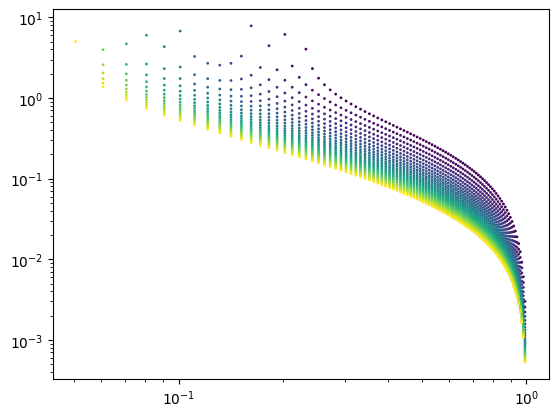

In [ ]:
cmap = plt.cm.viridis

sigma = 1.0
sigma_v = np.linspace(1e-4, sigma, 100)
nv = np.arange(5, 31)

nv_norm = plt.Normalize(vmin=min(nv), vmax=max(nv))

sigma_v, nv = (_.ravel() for _ in np.meshgrid(sigma_v, nv))

mu = calc_mu_eff(sigma_v, sigma, nv)

plt.scatter(sigma_v, mu, c=cmap(nv_norm(nv)), s=1)
plt.xscale('log')
plt.yscale('log')

In [130]:
radii = generate_bidisperse_radii(100, 0.5, 1.4)
which = 'small'


n_vertices_per_particle = np.ones_like(radii).astype(DT_INT)
# if mu_eff[i] > 0:
    # target_particle_id = np.argmin(np.abs(radii - particle_radius))
    # vertex_radius = get_closest_vertex_radius_for_mu_eff(mu_eff[i], radii[target_particle_id], nv[i])
    # for rad in np.unique(radii):
    #     mask = radii == rad
    #     diffs = np.abs(calc_mu_eff(vertex_radius, rad, nv_trial) - mu_eff[i])
    #     n_vertices_per_particle[mask] = nv_trial[~np.isnan(diffs)][np.argmin(diffs[~np.isnan(diffs)])]

mu_eff = 1
nv_small = 40

rad = np.min(radii)

vrad = get_closest_vertex_radius_for_mu_eff(mu_eff, rad, nv_small)

calc_mu_eff(vrad, rad, nv_small)

nv_trial = np.arange(5, 1000)
mu_trial = calc_mu_eff(vrad, np.max(radii), nv_trial)
mu_trial[np.isnan(mu_trial)] = np.inf
nv_large = nv_trial[np.argmin(np.abs(mu_trial - mu_eff))]

calc_mu_eff(vrad, np.max(radii), nv_large), nv_large

calc_mu_eff(vrad, np.max(radii), nv_small * np.max(radii) / np.min(radii))

np.float64(1.0335563581550082)

np.float64(0.19311028743217665)